In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.facecolor'] = 'none'

nodes = pd.read_csv("nodes.csv", sep="|") 
links = pd.read_csv("links.csv", sep="|")
nodes["name"] = nodes.apply(lambda x: json.loads(x["fields"]).get("name"),axis=1)
merged = pd.merge(links, nodes[["id","name","type"]], left_on='source', right_on="id")
merged = pd.merge(merged, nodes[["id","name","type"]], left_on='dest', right_on="id")

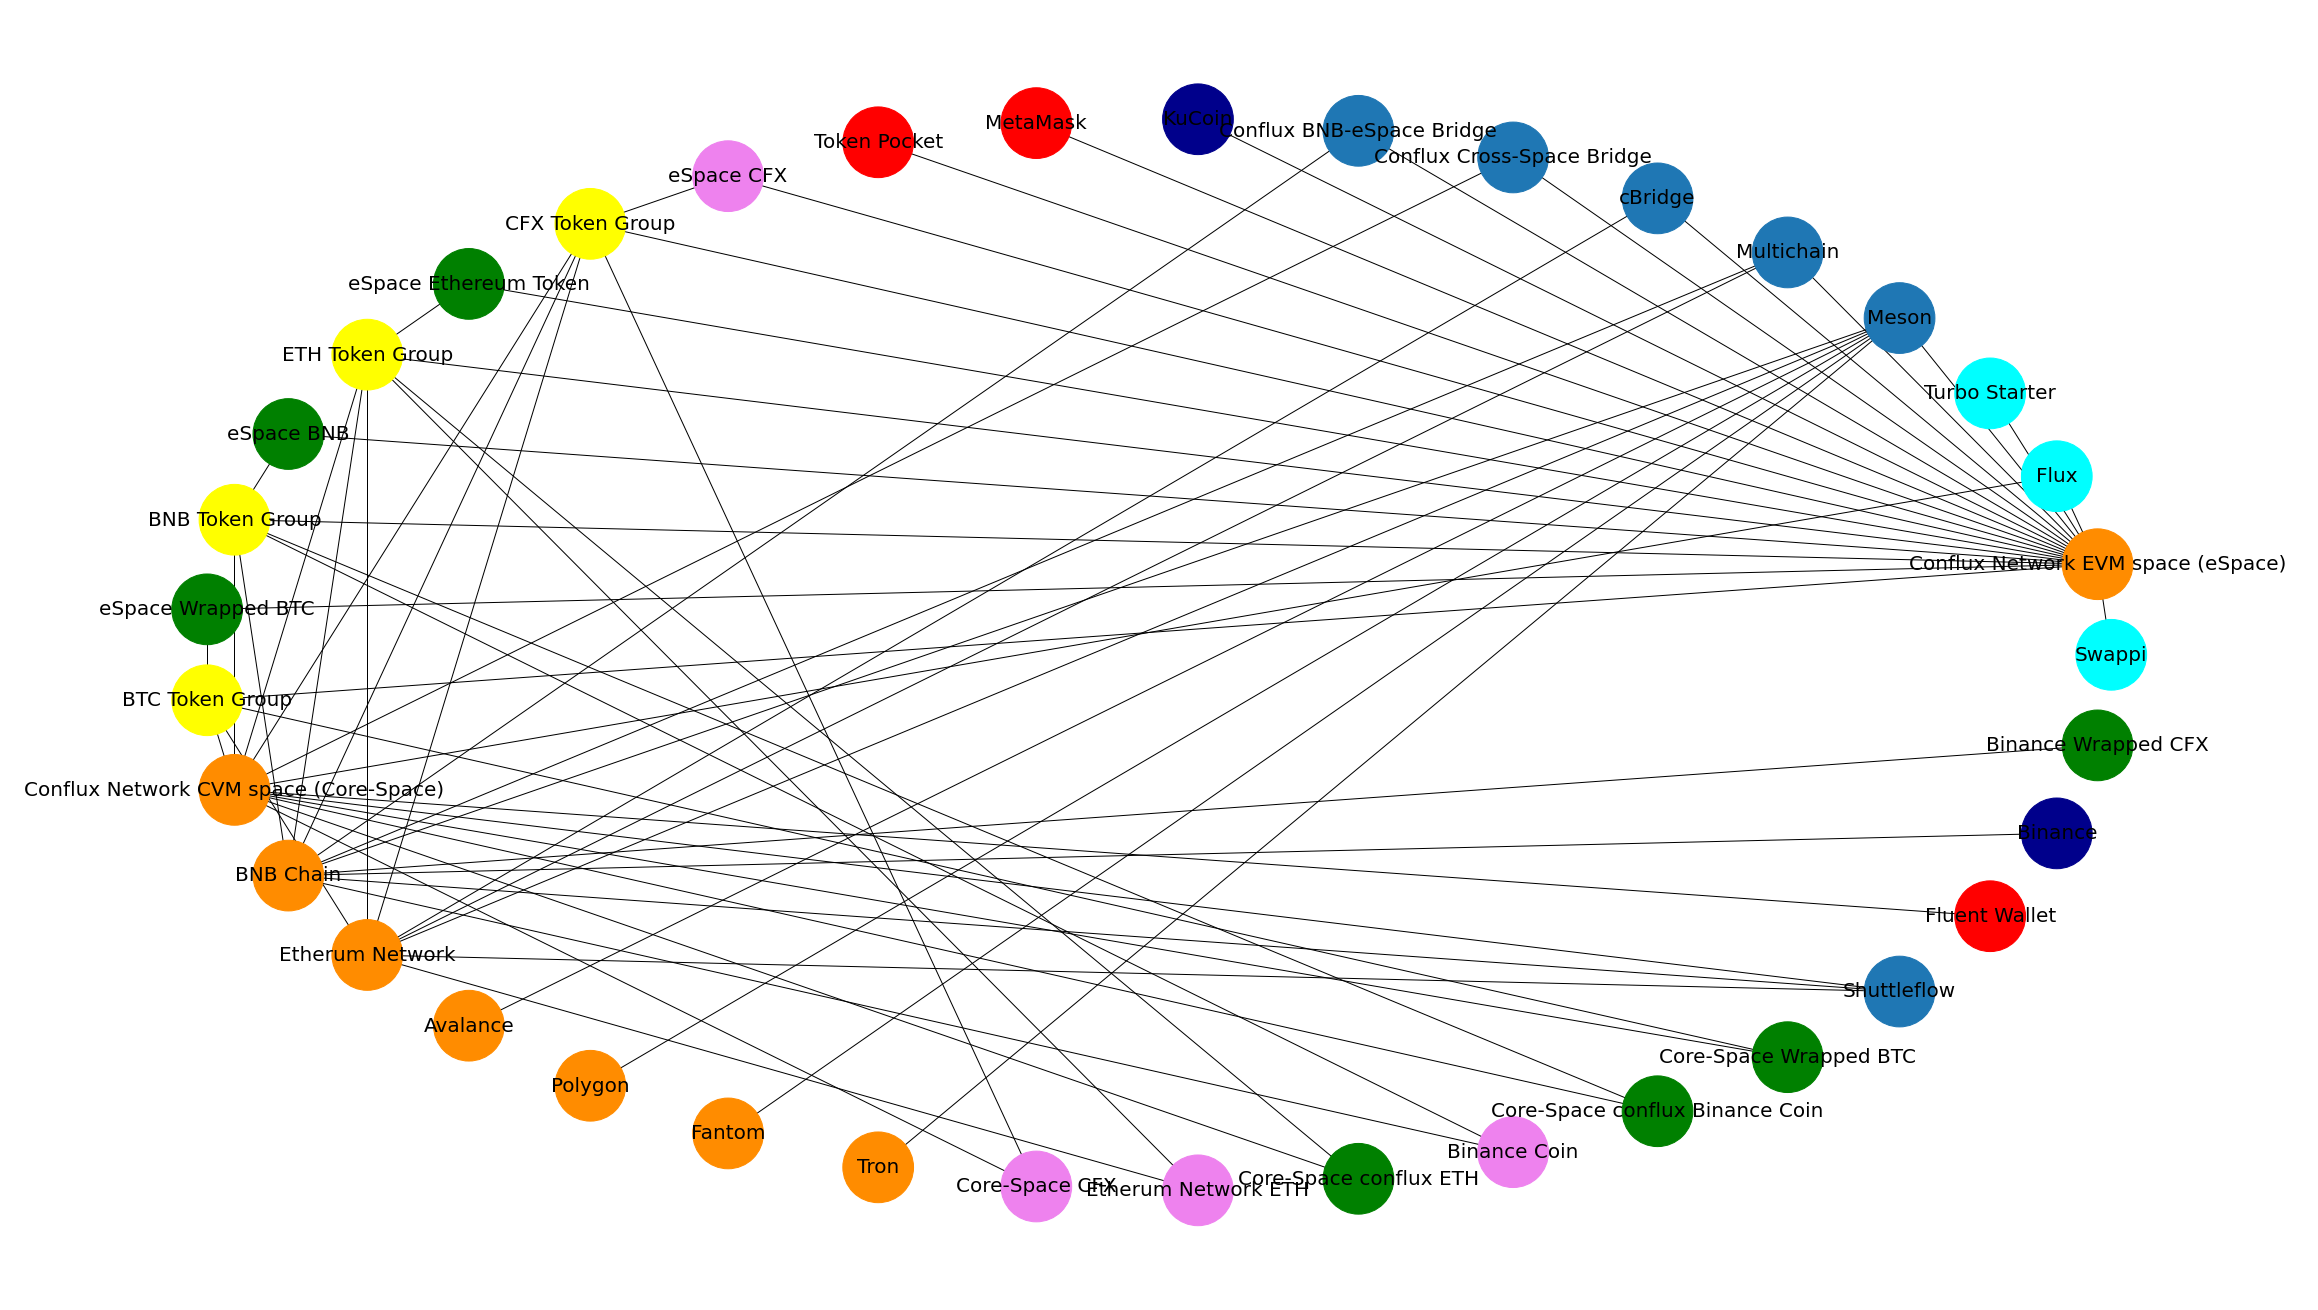

In [2]:
#all links
def chartAll(merged,nodes,links):

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types['type'] = pd.Categorical(types['type'])
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    cmap = matplotlib.colors.ListedColormap(['C0', 'darkblue', 'violet','cyan', 'darkorange','green','yellow','red'])


    fig = plt.figure(1, figsize=(32, 18))
    #fig.patch.set_facecolor('grey')
    fig.patch.set_alpha(0.5)
    nx.draw_circular(G,
                     with_labels = True, 
                     font_size=20, 
                     font_family="sans-serif", 
                     node_size=5000,
                     node_color=types['type'].cat.codes, cmap=cmap
                    )
    
chartAll(merged,nodes,links)

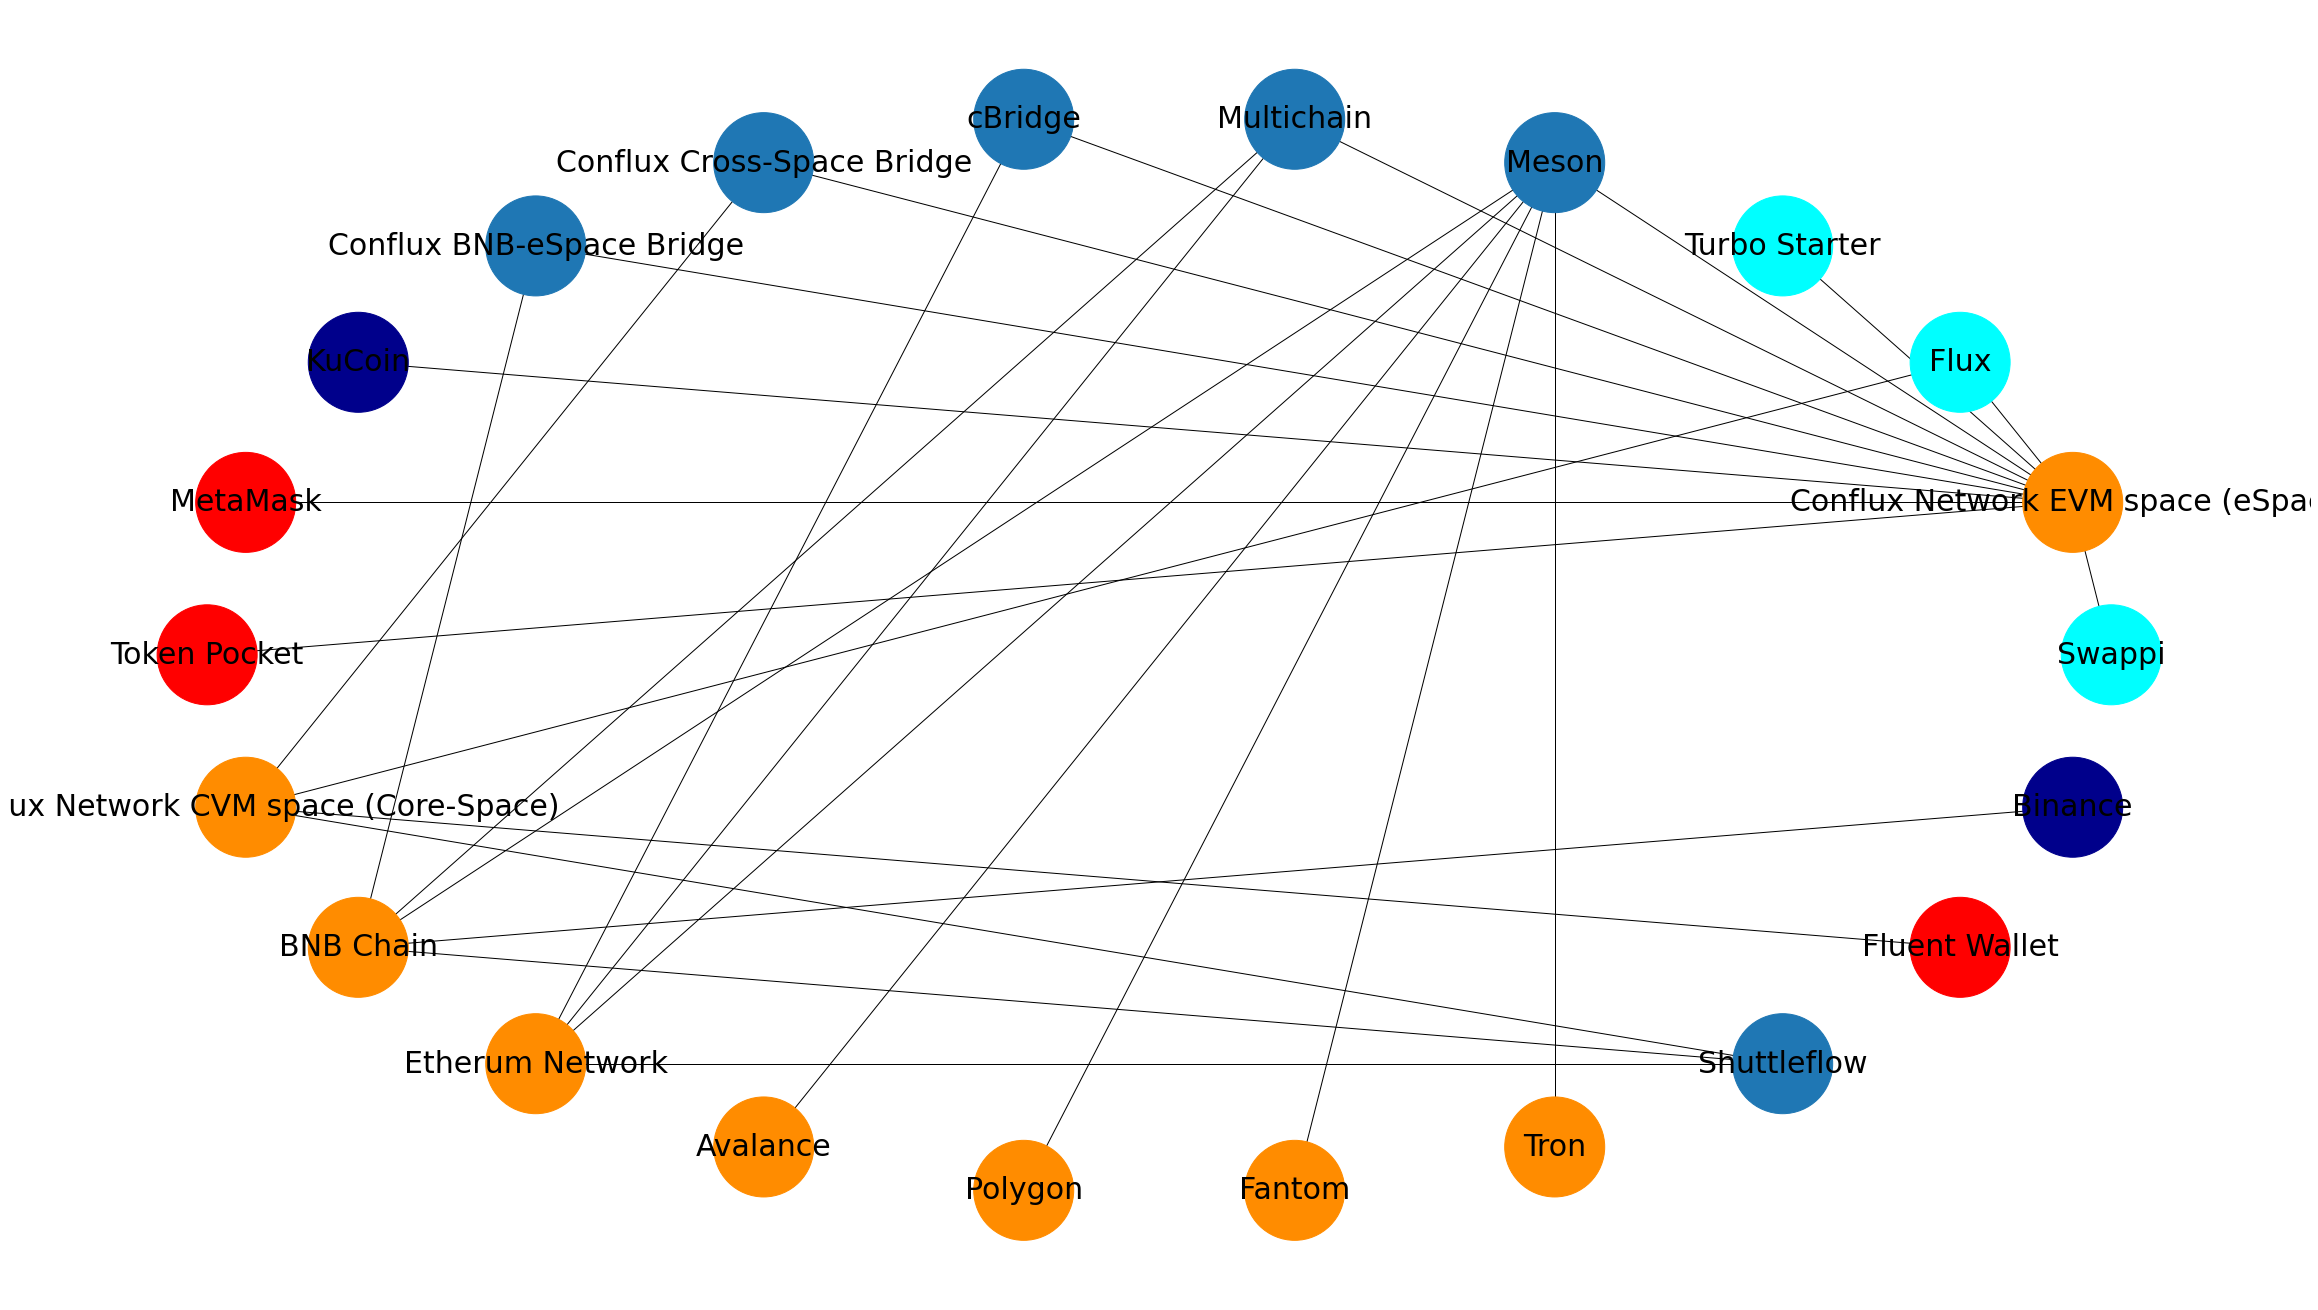

In [3]:
#### no coins or tokens

def chartNoCoinsOrTokens(merged,nodes,links):
    merged= merged[merged["predicate"]!="is_native_coin_on"]
    merged= merged[merged["predicate"]!="has_native_coin"]
    merged= merged[merged["predicate"]!="contract_deployed_on"]
    merged= merged[merged["predicate"]!="has_contract"]
    merged= merged[merged["predicate"]!="member_listed_on"]
    merged= merged[merged["predicate"]!="has_listed_member_of"]
    merged= merged[merged["predicate"]!="is_member_of"]
    merged= merged[merged["predicate"]!="has_member"]
    ####

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types['type'] = pd.Categorical(types['type'])
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    cmap = matplotlib.colors.ListedColormap(['C0', 'darkblue', 'violet','cyan', 'darkorange','green','yellow','red'])

    fig = plt.figure(1, figsize=(32, 18))
    fig.patch.set_alpha(0.7)
    nx.draw_circular(G,
                    with_labels = True,
                    font_size=30,
                    font_family="sans-serif",
                    node_size=10000,
                    node_color=types['type'].cat.codes, cmap=cmap
                    )
    
chartNoCoinsOrTokens(merged,nodes,links)

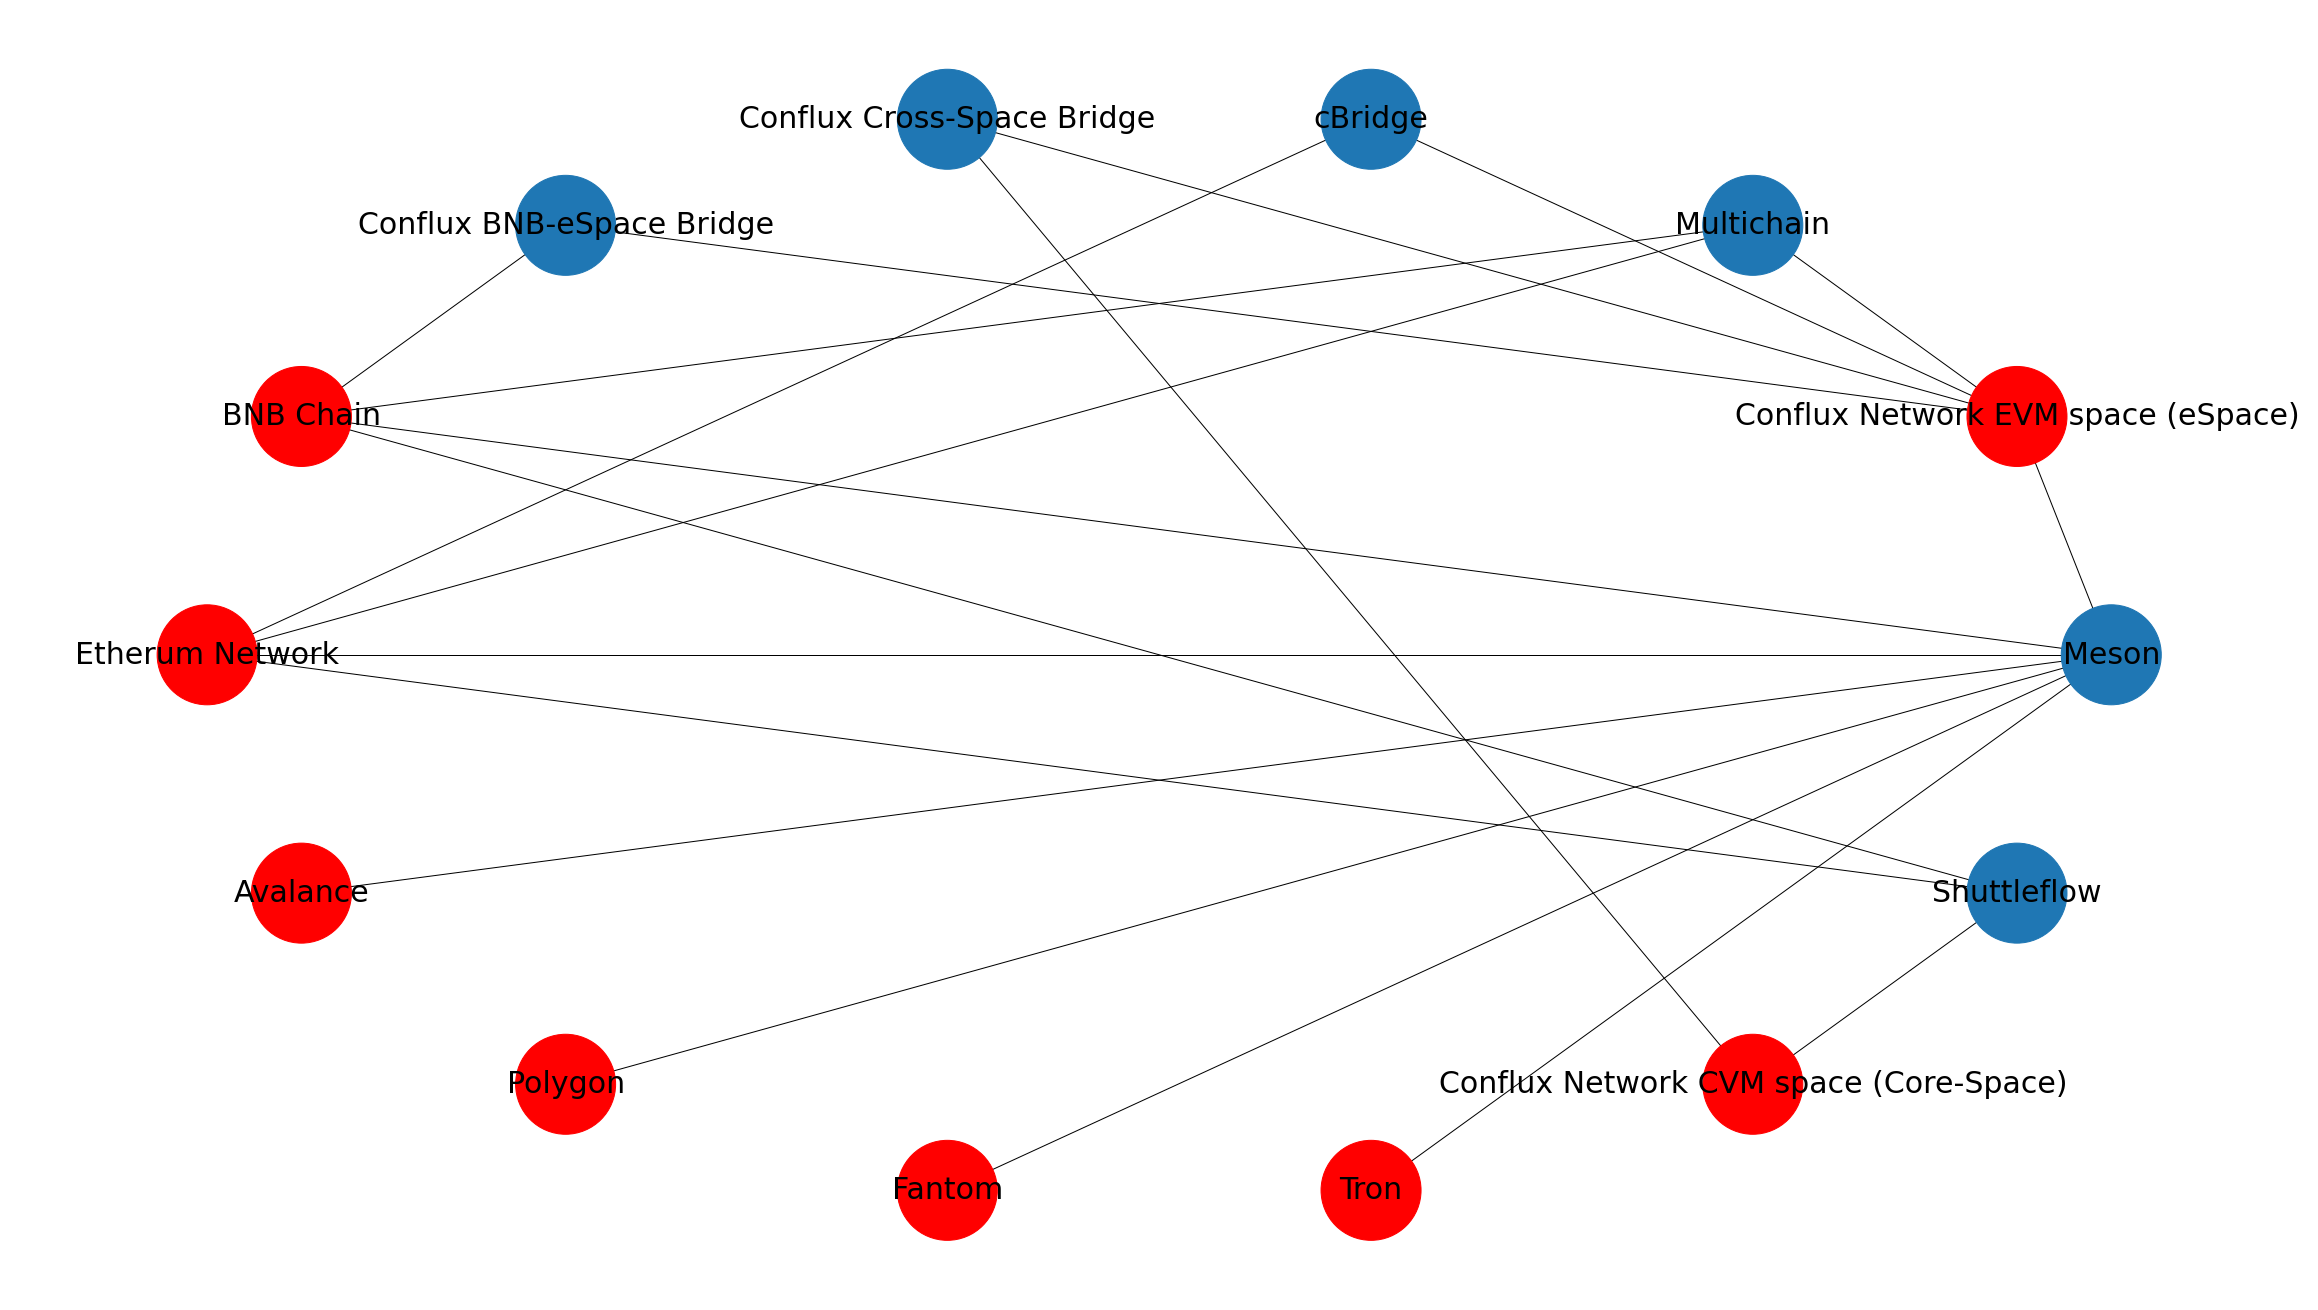

In [4]:
#### only bridges and networks

def chartBridgesNetworks(merged,nodes,links):
    merged= merged[
        (merged["type_x"]=="bridge") | (merged["type_y"]=="bridge")
    ]

    G = nx.from_pandas_edgelist(merged,source="name_x",target="name_y")

    types = pd.DataFrame({'ID':nodes["name"], 'type':nodes['type']})
    types['type'] = pd.Categorical(types['type'])
    types = types[types["ID"].isin(list(G.nodes))]
    types = types.set_index('ID')
    types = types.reindex(G.nodes())
    cmap = matplotlib.colors.ListedColormap(['C0', 'darkblue', 'violet','cyan', 'darkorange','green','yellow','red'])

    fig = plt.figure(1, figsize=(32, 18))
    fig.patch.set_alpha(0.5)
    nx.draw_circular(G,
                    with_labels = True,
                    font_size=30,
                    font_family="sans-serif",
                    node_size=10000,
                    node_color=types['type'].cat.codes, cmap=cmap
                    )
    
chartBridgesNetworks(merged,nodes,links)

In [5]:
'''
nx.draw(G)  
nx.draw_random(G)  
nx.draw_circular(G)  
nx.draw_spectral(G)  
nx.draw_spring(G)  
'''

'\nnx.draw(G)  \nnx.draw_random(G)  \nnx.draw_circular(G)  \nnx.draw_spectral(G)  \nnx.draw_spring(G)  \n'